In [120]:
import matplotlib.pyplot as plt

**!!! данные взяты из output-а dot_product.cpp**

In [142]:
thread_count = [1, 4, 8, 16]
element_count = [100000, 1000000, 10000000, 100000000]

In [143]:
atomic_data = {1:[0.001,0.009,0.09,0.916],4:[0.006,0.055,0.613,6.138],8:[0.009,0.073,0.778,8.056],16:[0.009,0.095,0.918,9.284]}

In [144]:
reduction_data = {1:[0,0.005,0.042,0.411],4:[0.001,0.001,0.012,0.118],8:[0.001,0.003,0.013,0.088],16:[0,0.001,0.012,0.096]}

In [145]:
consistent_data = {1:[0.001,0.004,0.038,0.422],4:[0.002,0.003,0.039,0.424],8:[0,0.003,0.041,0.447],16:[0.002,0.004,0.039,0.438]}

***Визуализация времени работы программы к размерности программы:***

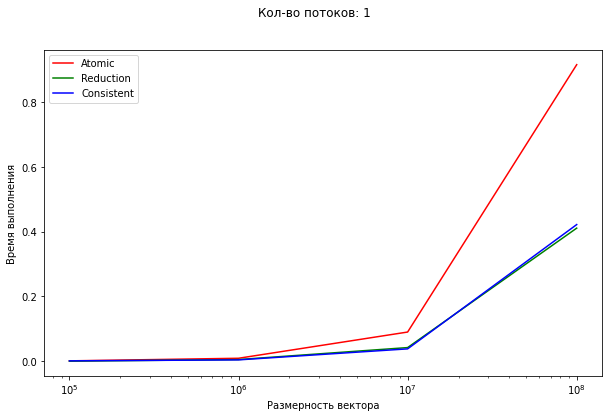

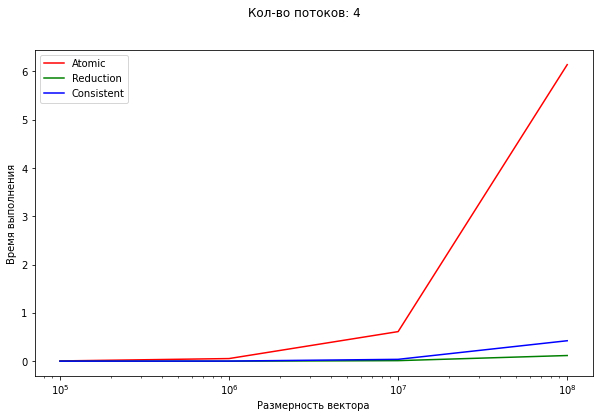

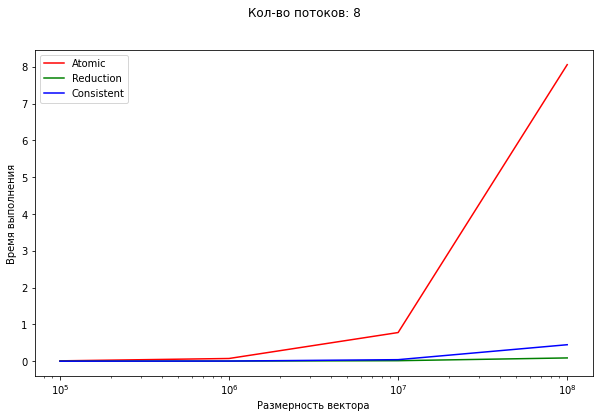

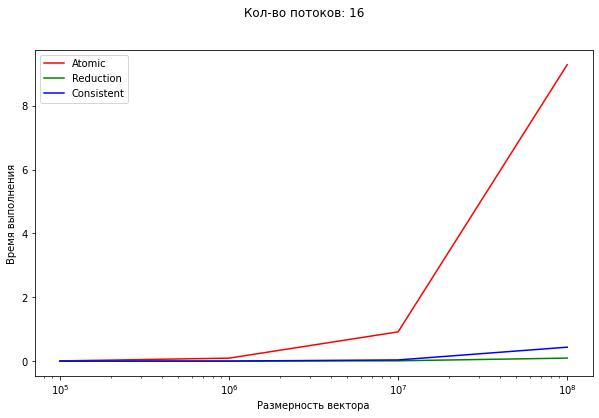

In [146]:
for i in range (len(element_count)):
    fig, ax1 = plt.subplots(ncols=1, figsize=(10, 6))
    ax1.set_xlabel('Размерность вектора')
    ax1.set_ylabel('Время выполнения')
    
    fig.suptitle('Кол-во потоков: %i' %(thread_count[i]))
    
    ax1.plot(element_count, atomic_data[thread_count[i]], label = "Atomic", color='r')
    ax1.plot(element_count, reduction_data[thread_count[i]], label = "Reduction", color='g')
    ax1.plot(element_count, consistent_data[thread_count[i]], label = "Consistent", color='b')

    ax1.legend()
    plt.xscale('log')
    plt.yscale('linear')

Как и ожидалось, reduce работает гораздо лучше на больших объемах данных. Атомик стабильно показывает, что он медленный на больших объемах вне зависимости от кол-ва потоков, даже при сравнении с последовательным выполнением без использования многопоточности

Однако при сравнительно небольших объемах (при размерности <= 10^5) - не важно, что использовать, как показывает статистика.

***Визуализация времени работы программы к кол-ву потоков:***

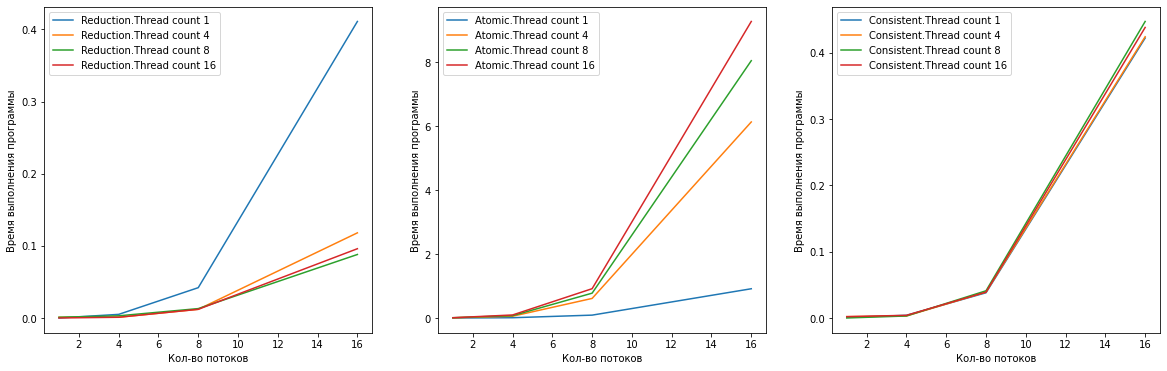

In [147]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20, 6))
ax1.set_xlabel('Кол-во потоков')
ax1.set_ylabel('Время выполнения программы')
ax2.set_xlabel('Кол-во потоков')
ax2.set_ylabel('Время выполнения программы')
ax3.set_xlabel('Кол-во потоков')
ax3.set_ylabel('Время выполнения программы')

for i in range(len(reduction_data)):
    ax1.plot(thread_count, reduction_data[thread_count[i]], label = 'Reduction.Thread count ' + str(thread_count[i]))
    ax2.plot(thread_count, atomic_data[thread_count[i]], label = 'Atomic.Thread count ' + str(thread_count[i]))
    ax3.plot(thread_count, consistent_data[thread_count[i]], label = 'Consistent.Thread count ' + str(thread_count[i]))

    
ax1.legend()
ax2.legend()
ax3.legend()

Здесь мы можем видеть, как кол-во потоков влияет на обработку данных. Reduce с увелечением кол-ва потоков стремительно уменьшает время выполнения программы. Особенно, в случае мигрорования с однопоточного приложения.
Однако, с определенного момента, кол-во потоков перестаев влиять на время исполнения, что тоже очевидно (потоки начинают простаивать)


В случае Атомика видно, что кол-во потоков играет роль отрицательную - блокировки сильно увеличивают время работы (что собственно и ожидаемо).